In [12]:
import numpy as np
import keras as ks
import matplotlib.pyplot as plt
from ipywidgets import interact
from matplotlib import colors

In [23]:
path1 = '/home/ht/EmuPBk/data/data_Bispectrum/k1.5/'

In [24]:
Bk_02_test = np.loadtxt(path1+'bk_norm15')
params_test = np.loadtxt(path1+'params15')
#x_H1_test = np.loadtxt('x_H1_test')

In [25]:
model = ks.models.load_model('Bk0.2New.h5')

IOError: Unable to open file (unable to open file: name = 'Bk0.2New.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
Bk_02_pdct = model.predict(params_test)

In [ ]:
Bk_02_pdct.shape, Bk_02_test.shape

In [15]:
k1 = np.array([0.1903934])
#k1 = np.array([0.3220935, 1.559453 ])
k2byk1 = np.arange(0.50,1.05,0.05) 		#======Ratio k2byk1========#
cosalpha = np.arange(0.50,1.00,0.01)	#======cosine of the angle between the k2 and k1 arms =======#
k2byk1 = k2byk1.reshape(11,1)
k2byk1.shape, cosalpha.shape

((11, 1), (50,))

In [16]:
Bk_test = np.zeros(shape=(len(Bk_02_test),11,50))
#Bk_pdct = np.zeros(shape=(len(Bk_02_pdct),11,50))
for i in range(len(Bk_02_test)):
    #Bk_pdct[i] = Bk_02_pdct[i].reshape(11,50)
    Bk_test[i] = Bk_02_test[i].reshape(11,50)

#Bk_pdct = Bk_pdct*100
Bk_test = Bk_test

In [ ]:
cond = k2byk1*cosalpha
cond

In [17]:
cond = k2byk1*cosalpha
for i in range(len(Bk_test)):
    for j in range(len(k2byk1)):
        for k in range(len(cosalpha)):
            if cond[j][k] < 0.5:
               # Bk_pdct[i][j][k] = np.nan
                Bk_test[i][j][k] = np.nan

#Bk_pdct = np.ma.masked_invalid(Bk_pdct)
Bk_test = np.ma.masked_invalid(Bk_test)

In [18]:
x,y = np.meshgrid(cosalpha,k2byk1)

In [ ]:
cosalpha

In [ ]:
k2byk1

In [19]:
def plot(index):
    plt.figure(figsize= (14,6))
    plt.tick_params(labelsize=10)

    #plt.suptitle(r'At $k_1$ = {0:f},$x_H$ = {1:.3f}, $\zeta$ = {2:.2f}, $Rmfp$= {3:.2f}, $M_h$= {4:.2f}$\times 10^8 M_\odot$'.format(k1[0],x_H1_test[index],params_test[index][0] , params_test[index][1] ,1.087*params_test[index][2]))
    
    #norm = colors.NoNorm(vmin=-1000,vmax=1000)
    plt.subplot(1,2,1)
    plt.title('Bispectrum')
    plt.imshow(Bk_test[index],origin='lower',extent=[0.50,0.99,0.50,1.00], cmap="viridis",)#norm = norm)
    plt.colorbar(label=r"$\frac{k_1^3k_2^3Bk}{(2\pi^2)^2}$",)

    plt.xlabel(r'$cos(\alpha)$')
    plt.ylabel(r'$k_2/k_1$')   
    '''
    plt.subplot(1,2,2)
    plt.title('ANN prediction')
    plt.imshow(Bk_pdct[index],origin='lower',extent=[0.50,0.99,0.50,1.00], cmap="viridis",)#norm = norm)
    plt.colorbar(label=r"$\frac{k_1^3k_2^3Bk}{(2\pi^2)^2}$",)
    plt.xlabel(r'$cos(\alpha)$')
    plt.ylabel(r'$k_2/k_1$') 
    '''
  

            

In [20]:
Bk_02_test[559]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

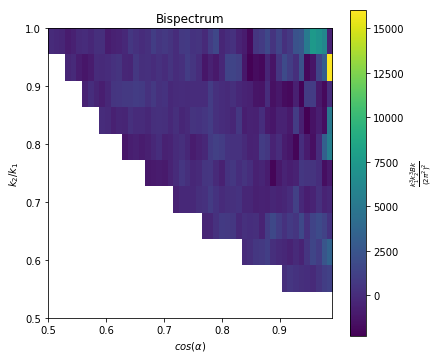

In [21]:
interact(plot, index =(0,len(Bk_test)-1,1))

In [ ]:
import cPickle as cp
import numpy as np

In [ ]:
Ntbins02 = cp.load(open('N0.2.pkl','rb'))
Ntbins03 = cp.load(open('N0.3.pkl','rb'))
Ntbins15 = cp.load(open('N15.pkl','rb'))
Bk = cp.load(open('Bispec0.2.pkl','rb'))

In [ ]:
Ntbins02.shape,Ntbins03.shape,Ntbins15.shape,Bk.shape

In [ ]:
a = np.argwhere(np.isnan(Bk))
a= a[:,0]
a = set(a)
a = list(a)
a

In [ ]:
Ntbins02 = np.delete(Ntbins02,a,axis = 0)
Ntbins03 = np.delete(Ntbins03,a,axis = 0)
Ntbins15 = np.delete(Ntbins15,a,axis = 0)
Bk = np.delete(Bk,a,axis=0)

In [ ]:
Ntbins02,Ntbins03,Ntbins15

In [ ]:
rootN = np.sqrt(Ntbins02)

In [ ]:
sigma = np.zeros(shape=Bk.shape)
for i in range(len(Bk)):

    sigma[i] = Bk[i]*1./rootN[i]

In [ ]:
sigma